## 1. Pima Native American Indian Diabetes dataset. Using multiple logistic regression to predict diabetes.


## Preparing environment

In [22]:

# Setting my working directory
setwd("C:/Users/Rumil/Datasets")

#importing my dataset and creating the object diabetes, for the diabetes dataset
diabetes_data <- read.csv("C:/Users/Rumil/Datasets/pima_indians_diabetes.csv")

#loading in packages for R
library(tidyverse)
library(reshape2)
library(ggplot2)
library(ggcorrplot)






library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(dplyr)
library(ggthemes)
library(RColorBrewer)
library(pROC)
library(caret)

ERROR: Error in library(ggthemes): there is no package called 'ggthemes'


## Dataset Overview

In [43]:
# A glimpse and summary of the data set
head(diabetes_data, 5)
glimpse(diabetes_data)
summary(diabetes_data)

#checking for any missing values
colSums(is.na(diabetes_data))

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


Observations: 768
Variables: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, ...
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, ...
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92,...
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, ...
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, ...
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, ...
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, ...
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30...
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

## 2. Preparing environment and ensuring correct data types before exploratory data analysis

In [5]:
#we notice the 0's in the dataset which although are not NA or NULLS, these data points can skew our model
#so it is best that we get rid of these observations that include 0's specifically for columns "Glucose" to "DiabetesPedigreeFunction"



# Use the 'mutate' function from dplyr package to recode the data and add it into our dataset as a new column

diabetes_data %>% mutate(Diabetic = ifelse(Outcome > 0, 1, 0))-> diabetes_data

#notice the new column marked as diabetic

head(diabetes_data, 5)
glimpse(diabetes_data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetic
6,148,72,35,0,33.6,0.627,50,1,1
1,85,66,29,0,26.6,0.351,31,0,0
8,183,64,0,0,23.3,0.672,32,1,1
1,89,66,23,94,28.1,0.167,21,0,0
0,137,40,35,168,43.1,2.288,33,1,1


Observations: 768
Variables: 10
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, ...
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, ...
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92,...
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, ...
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, ...
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, ...
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, ...
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30...
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...
$ diabetic                 <dbl> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...


## Using t-tests to see which variables are key predictors associated with diabetes.

In [8]:

# Does age have an effect? Age is continuous, so we use a t-test
diabetes_Age <- t.test(diabetes_data$Age ~ diabetes_data$diabetic)

# what about skin thickness? Im curious and since it is also a continuous variableAge we use a t-test
diabetes_Glucose <- t.test(diabetes_data$Glucose ~ diabetes_data$diabetic)

# BMI? BMI is also continuous so we can use a t-test
diabetes_BMI <- t.test(diabetes_data$BMI ~ diabetes_data$diabetic)

# Print the results to see if p<0.05.
print(diabetes_Age)
print(diabetes_Glucose)
print(diabetes_BMI)


	Welch Two Sample t-test

data:  diabetes_data$Age by diabetes_data$diabetic
t = -6.9207, df = 575.78, p-value = 1.202e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.545092 -4.209236
sample estimates:
mean in group 0 mean in group 1 
       31.19000        37.06716 


	Welch Two Sample t-test

data:  diabetes_data$Glucose by diabetes_data$diabetic
t = -13.752, df = 461.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35.74707 -26.80786
sample estimates:
mean in group 0 mean in group 1 
       109.9800        141.2575 


	Welch Two Sample t-test

data:  diabetes_data$BMI by diabetes_data$diabetic
t = -8.6193, df = 573.47, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.940864 -3.735811
sample estimates:
mean in group 0 mean in group 1 
       30.30420        35.14254 



## Visual Exploration

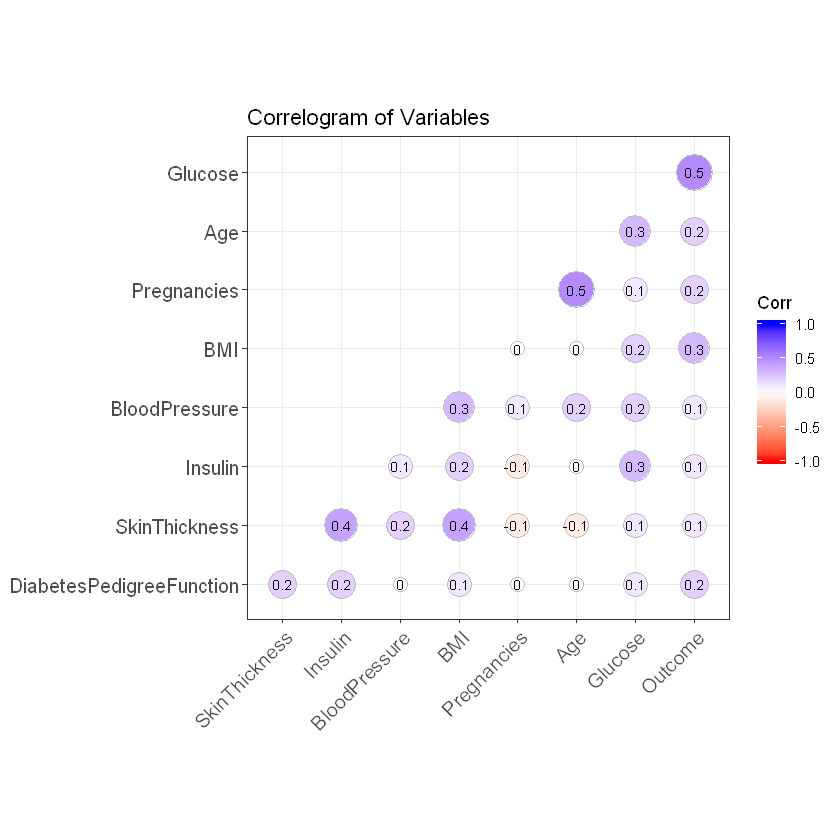

In [42]:
#lets check out the correlation between these predictors, we can use a correlogram 


corr<-round(cor(diabetes_data),1)

ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("red", "white", "blue"), 
           title="Correlogram of Variables", 
           ggtheme=theme_bw)



In [ ]:
#we can also use boxplots

## NOTES:
- Could use a sex variable in the future

package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rumil\AppData\Local\Temp\RtmpOeeg5x\downloaded_packages


Warning message:
"package 'ggcorrplot' was built under R version 3.6.2"

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123,0.22189815
Glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432,0.46658140
BloodPressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795,0.06506836
SkinThickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026,0.07475223
Insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295,0.13054795
BMI,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187,0.29269466
DiabetesPedigreeFunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131,0.17384407
Age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000,0.23835598
Outcome,0.22189815,0.46658140,0.06506836,0.07475223,0.13054795,0.29269466,0.17384407,0.23835598,1.00000000
